# Proyecto: Siniestros viales

El negocio no cuenta con información satisfactoria del comportamiento de sus clientes, es por esto que las inversiones en mercadotecnia se destinan a un publico general, por lo tanto, existe el interés de llevar a cabo una investigación que concluya con evidencia estadística sobre la  información relevante de las diferentes características  que involucran datos pertinentes de los  clientes que permita reforzar al negocio en puntos débiles que requieren una mejor atención para  obtener un ahorro de los  recursos económicos del negocio  y  a su vez ofrecer un mejor servicio. Es decir, los ingresos y egresos del negocio actual pueden ser potenciados identificando los factores que influyen en costos para el negocio.

La empresa bogotana de seguros SSeguro esta buscando identificar las causas de accidentalidad en las vias de Bogota, con el objetivo de tomar decisiones de mercadotecnia para reducir costos. Para esto se usaran datos de los siniestros registrados en bogota entre el año 2015 y 2020 y se hara un procesamiento de estos datos para su posterior analisis.

## Entendimiento del negocio

### Objetivos de la empresa

En general, La empresa busca identificar multiples relaciones con respecto a los siniestros ocurridos en Bogota. Estas relaciones son de utilidad para identificar como distribuir los publicos objetivos, es decir, identificar que tipos de seguros son mas aptos para que tipos de vehiculos y personas. Especificamente se busca contestar a las siguientes interrogantes para determinar que desiciones tomar para mejorar la rentabilidad del negocio.

- ¿Como se comportan los siniestros en el tiempo, es decir, es posible la prediccion de la cantidad de siniestros diarios?

- ¿Que factores tienen mayor peso para determinar la gravedad de un siniestro?

### Metas del proyecto

Para contestar a las preguntas de la empresa se planteo estudiar diferentes modelos de regresion entrenados bajo series de tiempo y entrenar clasificadores tanto supervisados como no supervisados para identificar las caracteristicas que mas influyen en la gravedad de un siniestro. En especifico se busca:

- Entrenar un perceptron multicapa, un arbol de decision y un regresor de k-vecinos para determinar que modelo describe mejor el comportamiento de la serie temporal.

- Entrenar un modelo de clasificacion supervisada de regresion logistica, de arbol de decision y k-vecinos, para determinar el peso de las caracteristicas en la gravedad de un siniestro.

- Entrenar un modelo no supervisado de k-medias para estudiar la cantidad de agrupamientos optimos para los datos, esto con el objetivo de observar coincidencias con los modelos supervisados.

#### Informacion

Este es un proyecto final realizado para el modulo 2 "Introduccion al Machine Learning con Python" del diplomado modular "Machine learning and data science" ofrecido por la Universidad Nacional de Colombia.

Autores: Diego M. Lopez; Juan A. Guzman.

### Paquetes

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import graphviz


#Indicamos a pandas que las visualizaciones se contruiran en Plotly y estableciendo seaborn por defecto

pd.options.plotting.backend = "plotly"

## Recoleccion de datos

Los datos provienen de la pagina 'https://datosabiertos.bogota.gov.co/dataset/siniestros-viales-consolidados-bogota-d-c', los cuales fueron limpiados y preprocesados en modulo 1 del diplomado y fueron cargados al github 'https://github.com/JuanAGuzman/Siniestros-Viales'. Estos datos contienen las siguientes caracteristicas: 

| Variable | Definición	| Valores |
| --- | --- | --- |
| CODIGO_ACCIDENTE | Codigo asociado al siniestro. | Valor tipo int. |
|FECHA| Dia, mes, año, hora, minuto y segundo en el que ocurrio el siniestro. | Valor tipo datetime. |
| GRAVEDAD | Grado de gravedad del siniestro. | 1(Con muertos), 2(Con heridos), 3(Solo daños).|
| CLASE_SINIESTRO | Tipo de siniestro ocurrido.  | 1(Choque), 2(Atropello), 3(Volcamiento), 4(Caida de ocupante), 5(Incendio), 6(Otro), 7(Autolesion). |
| CHOQUE | Elementos involucrados en el choque. | 0(No hubo choque), 1(Vehiculo), 2(Tren), 3(Semoviente), 4(Objeto fijo), 5(Peaton). |
| OBJETIVO_FIJO | Elemento inmovil contra el que ocurrio el siniestro. | 0(No hubo choque contra un objeto fijo), 1(Muro), 2(Poste), 3(Arbol), 4(Barandas), 5(Semaforo), 6(Inmueble), 7(Hidrante), 8(Valla, Señal), 9(Tarima, Caseta), 10(Vehiculo estacionado), 11(Otro).|
|DIRECCION| Direccion donde ocurrio el siniestro. | Variable tipo str. |
|CODIGO_LOCALIDAD| Codigo asociado a la localidad donde ocurrio el siniestro. | 1(Usaquén), 2(Chapinero), 3(Santa Fe), 4(San Cristóbal), 5(Usme), 6(Tunjuelito), 7(Bosa), 8(Kennedy), 9(Fontibón), 10(Engativá), 11(Suba), 12(Barrios Unidos), 13(Teusaquillo), 14(Los Mártires), 15(Antonio Nariño), 16(Puente Aranda), 17(La Candelaria), 18(Rafael Uribe Uribe), 19(Ciudad Bolivar), 20(Sumapaz).|
|DISENO_LUGAR| Tipo de lugar en el que ocurrio el siniestro. | 1(Tramo de via), 2(Intersección), 3(Via peatonal), 4(Paso elevado), 5(Paso inferior), 6(Paso a nivel), 7(Glorieta), 8(Puente), 9(Via troncal), 10(Lote o predio), 11(Cicloruta), 12(Ponton), 13(Tunel).|
|CODIGO_CAUSA| Codigo asociado a la hipotesis de la causa del sinietro. | Valor tipo int. |
|VEHICULO| Codigo del vehiculo involucrado en el siniestro. | Valor tipo str. |
|CLASE_VEHICULO| Tipo de vehiculo involucrado en el accidente. | 0(Peaton), 1(Automovil), 2(Bus), 3(Buseta), 4(Camion, Furgon), 5(Camioneta), 6(Campero), 7(Microbus), 8(Tractocamion), 9(Volqueta), 10(Motocicleta), 11(Maquina Agricola), 12(Maquina Industrial), 13(Bicicleta), 14(Motocarro), 15(Traccion animal), 16(Otro), 17(Motociclo), 18(No identificado), 19(Bus Articulado), 20(Bus Alimentador), 21(Tren), 22(Ambulancia), 23(Metro), 24(Cuatrimoto), 25(Remolque), 26(Semi-Remolque), 27(Bus Bi-Articulado).|
|SERVICIO| Tipo de servicio prestado por el vehiculo involucrado. |0(Sin informacion), 1(Oficial), 2(Publico), 3(Particular), 4(Diplomatico).|
|MODALIDAD| Modalidad de carga/pasajeros presentes en el vehiculo. |1(Mixto), 2(Carga - Extrapesada), 3(Carga - Extradimensionada), 4(Pasajeros - Colectivo), 5(Pasajeros - Individual), 6(Pasajeros - Especial escolar), 7(Pasajeros - Especial turismo), 8(Pasajeros - Especial asalariado), 9(Pasajeros - Especial Ocasional), 10(Pasajeros - Masivo), 11(Carga - Pesada), 12(Carga - Mercancia Peligrosa).|
|ENFUGA| El vehiculo se encuentra en fuga del siniestro. | 1(No), 2(Si)|
|CODIGO_ACCIDENTADO| Codigo asociado al paciente accidentado. | Valor tipo str. |
|CONDICION| Clasificacion del tipo de actor que es el individuo en el siniestro. | 1(CONDUCTOR), 2(MOTOCICLISTA), 3(PASAJERO/ACOMPAÑATE), 4(PEATON), 5(CICLISTA). |
|ESTADO| Condicion del individuo involucrado en el siniestro. |  1(ILESO), 2(HERIDO), 3(MUERTO) |
|EDAD| Edad del individuo. | Variable tipo int. |
|SEXO| Sexo del individuo. | 1(MASCULINO), 2(FEMENINO), 3(SIN INFORMACION) |

Este primer componente del proyecto hace un uso diferente de los datos, generando una serie de tiempo del conteo de siniestros diarios.

### Datos

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/JuanAGuzman/Siniestros-Viales/main/siniestros_viales.csv")

In [3]:
df_time = pd.to_datetime(df.FECHA)
ts = df.groupby(['CODIGO_ACCIDENTE', df_time.dt.date]).size().reset_index()
ts = ts.groupby(ts.FECHA).size()
ts.plot()

Con esto generamos la serie de tiempo *ts*, la cual describe la cantidad de siniestros diarios entre los años 2015 y 2020. Cabe destacar que debido a los eventos ocurridos a causa del COVID-19, la cantidad de siniestros presentan un decenso a comienzo de Marzo.

## Analisis serie temporal

Comenzemos definiendo los parametros a estudiar para los diferentes modelos:

In [4]:
params_mlp = {
    'activation' : ['tanh'],
    'max_iter': [3500],
    'hidden_layer_sizes': [(80, 120, 40)]
 }

params_dtr = {
   'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
   'max_depth': [10, 20, 30, 40],
   'max_leaf_nodes': [500, 1000, 1500]
}

params_knr = {
    'n_neighbors': [1, 2, 5, 10],
    'weights': ['uniform', 'distance']
}

parameters = {'mlp' : params_mlp,
              'dtr' : params_dtr,
              'knr' : params_knr}

Con esto podemos definir una nueva clase que contenga todo lo necesario para entrenar los diferentes modelos, estudiar las predicciones de estos y el desempeño que presenten. Ademas es necesario definir la funcion **date_split** encargada de dividir los datos de entrenamiento y prueba entorno a la fecha dada.

In [5]:
def date_split(ts, date):
   """
   Entradas:
     ts: Serie de pandas o array de numpy de una serie temporal.
     date: Cadena de texto de la fecha en la cual separar el entrenamiento y el test.
   Retorna:
     data_train: Serie temporal hasta la fecha date.
     data_test: Serie temporal desde la fecha date.
   """
   ts.index = ts.index.astype(str)
   data_train = ts.loc[:date].values
   data_test  = ts.loc[date:].values
   return data_train, data_test

class model():
    def __init__(self, ns = 3, seed=1234,):
        self.models = { 'mlp': MLPRegressor(solver = 'adam',
                                            n_iter_no_change = 50,
                                            validation_fraction = 0.2,
                                            random_state=seed),
                        'dtr' : DecisionTreeRegressor(random_state=seed),
                        'knr' : KNeighborsRegressor()}
        self.tsp = TimeSeriesSplit(n_splits = ns)

    def sliding_time(self, ts, window_size=30):
        """
        Entradas:
          ts: Serie de tiempo en formato array o serie de pandas de tamaño n.
          window_size: Entero indicando el tamaño de las ventanas.
        Retorna:
          X: Matriz de datos con tamaño (n,window_size) con cada fila como una ventana de la serie temporal.
          y: Arreglo de valores de prediccion para cada ventana.
        """
        ts = ts.reshape(1,-1)[0]
        n = ts.shape[0] - window_size
        X = np.empty((n, window_size))
        y = np.empty(n)
        for i in range(window_size, ts.shape[0]):
          y[i - window_size] = ts[i]
          X[i- window_size, 0:window_size] = np.array(ts[i - window_size:i])
        return X, y

    def train(self, ts, parameters, ws=30):
        X, y = self.sliding_time(ts, window_size=ws)
        for key in self.models.keys():
            gsearch = GridSearchCV(self.models[key],
                                    parameters[key],
                                    scoring='r2',
                                    cv = self.tsp,
                                    verbose=3)
            gsearch.fit(X, y)
            self.models[key] = gsearch.best_estimator_

    def model_prediction(self, model, ts, ws=30):
        X, y = self.sliding_time(ts, window_size=ws)
        y_pred = self.models[model].predict(X)
        return y_pred, y

    def prediction_plot(self, model, ts, ws = 30):
        y_, y_test = self.model_prediction(model, ts, ws=ws)
        df = pd.DataFrame({'Valor predicho (pruebas)':y_, 'Valor verdadero (pruebas)':y_test})
        fig = fig = go.Figure()
        fig.add_trace(go.Scatter(y = y_, mode='lines', name = 'Valor predicho (pruebas)'))
        fig.add_trace(go.Scatter(y = y_test, mode='lines', name = 'Valor verdadero (pruebas)'))
        fig.update_layout(title=dict(text=f"Predicción vs valores verdaderos (pruebas) del {model}", automargin=True), legend_title_text='Valores')
        fig.show()


    def next_value(self, model, window):
      """
      Entradas:
        model: modelo de regresión de Scikit-Learn entrenado.
        window: arreglo de NumPy con shape (w,) donde w es el tamaño de la ventana.
      Retorna:
        next: el valor de la predicción con el siguiente valor a la ventana.
      """
      next = self.models[model].predict([window])
      return next[0]

    def predict_n_future_values(self, model, window, n):
      """
      Entradas:
        model: modelo de regresión entrenado con w características de entrada.
        window: arreglo de NumPy con tamaño (w,)
        n: número de pasos temporales a predecir.
      Retorna:
        pred: arreglo de NumPy con tamaño (n,) con la predicción de los siguientes n valores
      """

      wind, pred = window, []
      for i in range(n):
        pred.append(self.next_value(model, wind))
        wind = np.concatenate((wind,[self.next_value(model, wind)]))[1::]
      return np.array(pred)
    
    def n_prediction_plot(self, model, window, n):
        y_ = self.predict_n_future_values(model, window, n)
        fig = go.Scatter(y = y_, mode='lines', name='Valor predicho (pruebas)')
        fig.update_layout(title =f'Prediccion de {n} dias para el modelo {model}')
        fig.show()

    def r2_scoring(self, model, ts):
       y_pred, y_test = self.model_prediction(model, ts)
       return r2_score(y_test, y_pred)

Con esta clase podemos de manera sencilla entrenar los tres modelos bajo los parametros definidos:

In [6]:
train, test = date_split(ts, '2017-12-31')
modelo = model()
modelo.train(train, parameters)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[CV 1/3] END activation=tanh, hidden_layer_sizes=(80, 120, 40), max_iter=3500;, score=-0.003 total time=  23.0s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(80, 120, 40), max_iter=3500;, score=-0.235 total time=  18.1s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(80, 120, 40), max_iter=3500;, score=0.243 total time=  24.8s
Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END criterion=squared_error, max_depth=10, max_leaf_nodes=500;, score=-0.498 total time=   0.0s
[CV 2/3] END criterion=squared_error, max_depth=10, max_leaf_nodes=500;, score=-0.141 total time=   0.0s
[CV 3/3] END criterion=squared_error, max_depth=10, max_leaf_nodes=500;, score=-0.230 total time=   0.0s
[CV 1/3] END criterion=squared_error, max_depth=10, max_leaf_nodes=1000;, score=-0.498 total time=   0.0s
[CV 2/3] END criterion=squared_error, max_depth=10, max_leaf_nodes=1000;, score=-0.141 total time=   0.0s
[CV 3/3] END criterion=squared_error, max_depth=10, max_leaf_nodes=1000;, sc

Ahora podemos visualizar las predicciones realizadas por los modelos:

In [7]:
modelo.prediction_plot('mlp', test),
modelo.prediction_plot('dtr', test),
modelo.prediction_plot('knr', test)

Notamos un mejor comportamiento en los dos ultimos modelos, para determinar si esto es verdad estudiemos el coeficiente $R^2$:

In [8]:
modelo.r2_scoring('mlp', train), modelo.r2_scoring('dtr', train), modelo.r2_scoring('knr', train)

(0.3620054925967784, 0.8168646940803623, 1.0)

Para los datos de entrenamiento el arbol de decision se desempeña muy bien y el k-vecinos es perfecto, esto puede ser indicador de un sobre ajuste, corroboremos estudiando el score para los datos de prueba:

In [9]:
modelo.r2_scoring('mlp', test), modelo.r2_scoring('dtr', test), modelo.r2_scoring('knr', test)

(0.1874079168420716, 0.24197105900529603, 0.42680325791097273)

Notamos una disminucion del score en los tres modelos, esto indica un sobre ajuste de los modelos. A pesar de esto, el k-vecinos fue el que mejor se desempeño, con esto en mente observemos como predicen los modelos nuevos valores:

In [10]:
X_test = modelo.sliding_time(test)[0]

In [11]:
pd.DataFrame(modelo.predict_n_future_values('mlp', X_test[-1], 90)).plot()

In [12]:
pd.DataFrame(modelo.predict_n_future_values('dtr', X_test[-1], 90)).plot()

In [13]:
pd.DataFrame(modelo.predict_n_future_values('dtr', X_test[-15], 365)).plot()

In [14]:
pd.DataFrame(modelo.predict_n_future_values('knr', X_test[-1], 365)).plot()

In [15]:
pd.DataFrame(modelo.predict_n_future_values('knr', X_test[-15], 365)).plot()

Para concluir este componente, se puede decir que el modelo mejor ajustado a los datos originales de siniestros por día es el de k-vecinos, además en el modelo de decisión tree comienza con una predicción que no parece tener ningún patrón o periodicidad, sin embargo aumentamos la serie de tiempo del modelo vemos que termina teniendo un comportamiento periódico, algo caracteristico de los tres modelos y que reducen la confiabilidad de estos.

## Clasificacion

En este segundo componente estudiaremos el agrupamiento de los datos, esto debido a que se busca encontrar que influye en la gravedad de un siniestro, para esto es primordial limpiar los datos y preprocesarlos para que los modelos presenten el mejor desempeño.

#### Limpieza de datos

Primero eliminemos las caracteristicas no relevantes, debido a que no son factores del siniestro si no de identificacion, ademas limpiemos todas las muestras que no contengan informacion relevante, es decir que se reporte sin informacion sobre el suceso:

In [16]:
cols = ["Unnamed: 0", "CODIGO_ACCIDENTE", "DIRECCION", "CODIGO_ACCIDENTADO", "MODALIDAD", "VEHICULO"]
df.drop(cols, axis=1, inplace=True)

info = {'SEXO':'SIN INFORMACION', 'EDAD':'SIN INFORMACION', 'ENFUGA':'N'}

def clean_unknown(df, information):
    for key, value in information.items():
        df = df[~(df[key]==value)]
    return df

df = clean_unknown(df, info)

Ahora definamos las siguientes funciones que se encargaran del prepocesamiento de los datos. A los datos numericos se les transforma bajo un MinMaxScaler dentro del rango (0, 1) y a los categoricos se les aplica un OneHotEncoder. Por ultimo se separan los datos de entrenamiento y prueba.

In [17]:
def transform_data(df, numeric_cols, categoric_cols, numeric_transform=MinMaxScaler, categoric_transform=OneHotEncoder,
                    f_range=(0, 1), sp = False):
    try:
        X_num = numeric_transform(feature_range=f_range).fit_transform(df[numeric_cols])
        X_cat = categoric_transform(sparse=sp).fit_transform(df[categoric_cols])
        X_ = np.concatenate((X_num, X_cat), axis=1)
        return X_
    except TypeError:
        print("Ingrese valores validos")

def supervised_data_split(df, numeric_cols, categoric_cols, y_col, test_n=0.3, seed=123):
    X_ = transform_data(df, numeric_cols, categoric_cols)
    y = df[y_col].values
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=test_n, random_state=seed)
    return X_train, X_test, y_train, y_test


Los datos numericos a conservar son la edad y los categoricos son la clase del siniestro, el tipo de choque, la clase del vehiculo y el sexo de la persona involucrada.

In [18]:
num_cols = ['EDAD']
cat_cols = ['CLASE_SINIESTRO', 'CHOQUE', 'CLASE_VEHICULO', 'SEXO']
y_col = 'GRAVEDAD'

In [19]:
X_train, X_test, y_train, y_test = supervised_data_split(df, num_cols, cat_cols, y_col, test_n=0.5)

c:\Users\juan1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



### Supervisado

Con los datos preparados podemos continuar a entrenar los diferentes modelos.

#### Modelos de Clasificacion

##### Regresion Logistica

Empecemos entrenando un modelo de regresion logistica.

In [20]:
def LR_train_model(X_train, X_test, y_train, y_test, seed=2):
    model = LogisticRegression(random_state=seed).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return model, acc

In [21]:
model, acc = LR_train_model(X_train, X_test, y_train, y_test)

In [22]:
acc

0.9293981481481481

Notamos que el modelo presenta una alta exactitud, tomando esto como un buen modelo observemos el peso de los coeficientes:

In [23]:
model.coef_

array([[-1.55766746e+00, -4.63202535e-03, -4.54150309e-01,
        -3.71083501e-01,  1.57193909e-01,  6.72443349e-01,
         2.36445222e-01,  8.43441596e-01,  0.00000000e+00,
        -8.48073621e-01, -2.32041773e-01, -2.28576636e-04,
         4.13064178e-01, -4.13292754e-01]])

De esto observamos que la caracteristica mas determinante para la gravedad de un accidente es la edad.

##### Clasificador k-vecinos

Corroboremos que los datos sean optimos para entrenar un modelo que prediga tres salidas, para esto entrenemos un modelo de k-vecinos para identificar la cantidad de vecinos optimos:

In [24]:
acc_matrix = []
K = range(2, 10)
for k in K:
    knc = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = knc.predict(X_test)
    acc_matrix.append(accuracy_score(y_test, y_pred))

fig = go.Figure(data=go.Scatter(x=list(K), y=acc_matrix, mode='lines'))
fig.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.9120370370370371

In [26]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

Notamos que agrupar bajo tres clases obtiene una exactitud mas que satisfactoria, es por esto que podemos decir que los datos son obtimos para estudiar sus caracteristicas. Esto le da peso a la conclusion obtenida previamente.

### Arboles de Decision

Entrenemos un arbol de decision y observemos la importancia de las caracteristicas:

In [27]:
X_tree, y_tree = df[num_cols+cat_cols].replace(['MASCULINO', 'FEMENINO'], [0, 1]), df.GRAVEDAD
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_tree, y_tree, test_size=0.3, random_state=1234)

In [28]:
dtc = DecisionTreeClassifier().fit(X_train_dt, y_train_dt)
dtc.score(X_test_dt, y_test_dt) 

0.8921001926782274

In [29]:
dtc.feature_importances_

array([0.76724849, 0.10551533, 0.07074116, 0.        , 0.05649502])

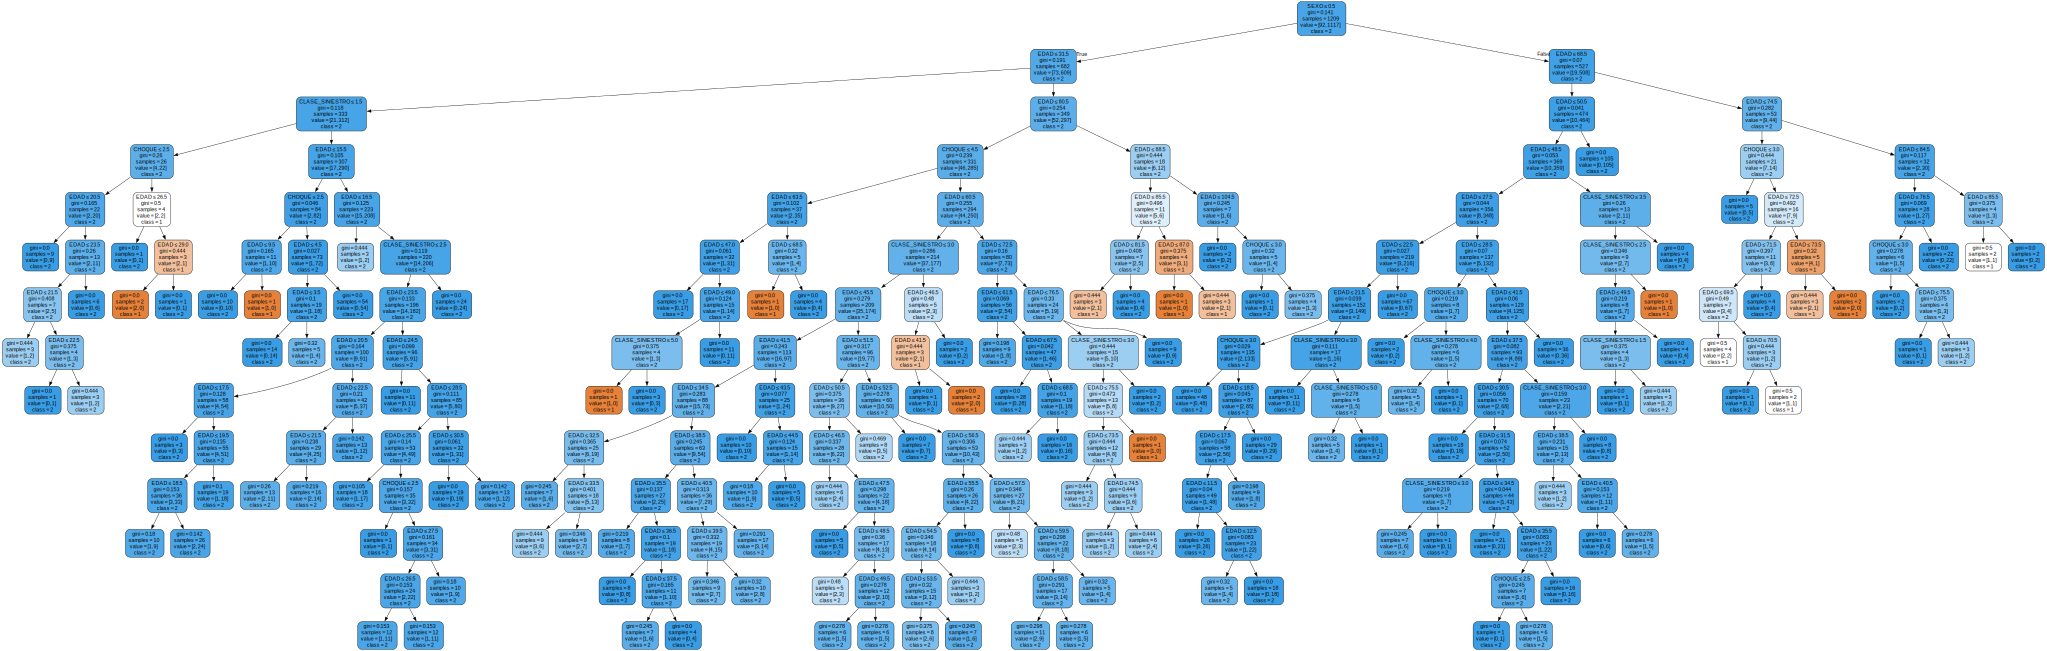

In [35]:
from IPython.display import SVG
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

graphviz_data = export_graphviz(dtc, # Árbol de decisión entrenado.
                                out_file=None,      # Se usa 'None' para generar un string con el resultado.
                                feature_names=X_tree.columns,  # Nombre de las características.
                                class_names=['1', '2'],     # Nombre de las clases.
                                 # Configuración de estilo.
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(graphviz_data)
SVG(graph.pipe(format='svg'))

In [36]:
dtc = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes=3).fit(X_train_dt, y_train_dt)
dtc.score(X_test_dt, y_test_dt) 

0.9171483622350675

In [38]:
dtc.feature_importances_

array([0.45654174, 0.        , 0.        , 0.        , 0.54345826])

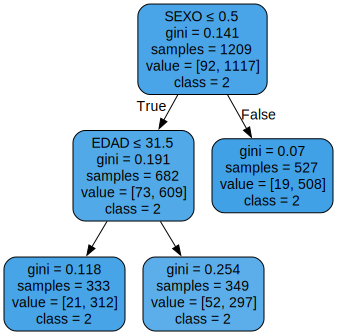

In [37]:
from IPython.display import SVG
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

graphviz_data = export_graphviz(dtc, # Árbol de decisión entrenado.
                                out_file=None,      # Se usa 'None' para generar un string con el resultado.
                                feature_names=X_tree.columns,  # Nombre de las características.
                                class_names=['1', '2'],     # Nombre de las clases.
                                 # Configuración de estilo.
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(graphviz_data)
SVG(graph.pipe(format='svg'))

Nuevamente se obtiene que una de las variables con mas peso es la edad, pero ademas se identifica un peso relevante para la clase del siniestro y para la edad, esto va respaldado por la exactitud y la evidencia obtenida en los diferentes modelos de clasificacion supervisada entrenados.

### No supervisado

Lo primero a realizar en este componente es reducir la dimensionalidad de los datos, ya que contamos con datos de 14 componentes, esto es ineficiente para entrenar modelos de k-medias, es por esto que debemos observar el porcentaje de los datos explicados por las diferentes componentes.

#### Reduccion de la dimensionalidad

In [ ]:
pca = PCA().fit(X_train)
percentage = pca.explained_variance_ratio_.cumsum()
fig = go.Figure(data=go.Scatter(y = percentage, mode='lines', name='Varianza explicada acumulada'))
fig.update_layout(title='Curva acumulativa de la varianza explicada VS n° de componentes principales')
fig.show()

Observamos que con 2 o mas caracteristicas ya se describe mas del 85% de la informacion de los datos. Bajo esto tomemos el caso limite y consideremos unicamente dos componentes.

In [ ]:
inercia = []
pca = PCA(n_components=2).fit(X_train)
K = range(2, 10)
X_km_train = pca.transform(X_train)
X_km_test = pca.transform(X_test)

for k in K:
    km = KMeans(n_clusters = k, n_init=10).fit(X_km_train)
    inercia.append(km.inertia_)

fig = go.Figure(data=go.Scatter(x=list(K), y=inercia, mode='lines', name='Inercia'))
fig.update_layout(title='K vs Inercia')
fig.show()

In [ ]:
silhouette_scores = []

K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k, n_init=10).fit(X_km_train)
    y = km.predict(X_km_test)
    silhouette_scores.append(silhouette_score(X_km_test, y))

fig = go.Figure(data=go.Scatter(x=list(K), y=silhouette_scores, mode='lines'))
fig.update_layout(title='K vs Coeficiente de silueta')
fig.show()

In [ ]:
def plot_metric(K, scores, metric_name):
  fig = go.Figure(data=go.Scatter(x=list(K), y=scores, mode='lines'))
  fig.update_layout(title=f'K vs {metric_name}')
  fig.show()
  
def plot_extern_metric(X, y, metric, metric_name):
  scores = []
  for i in range(2,20):
    model = KMeans(n_clusters=i, n_init=10)
    model.fit(X)
    y_pred = model.predict(X)
    scores.append(metric(y, y_pred))

  plot_metric(range(2, 20), scores, metric_name)

In [ ]:
plot_extern_metric(X_train, y_train, homogeneity_score, 'Homogeneidad')

In [ ]:
plot_extern_metric(X_train, y_train, mutual_info_score, 'Información mutua')

In [ ]:
plot_extern_metric(X_train, y_train, adjusted_rand_score, 'Índice de Rand ajustado')

Con esto las metricas de este modelo no supervisado indica una mejor clasificacion para 2 grupos o mas de 12 grupos, esto indica que la reduccion de la dimensionalidad nos esta creando dos grupos de datos.

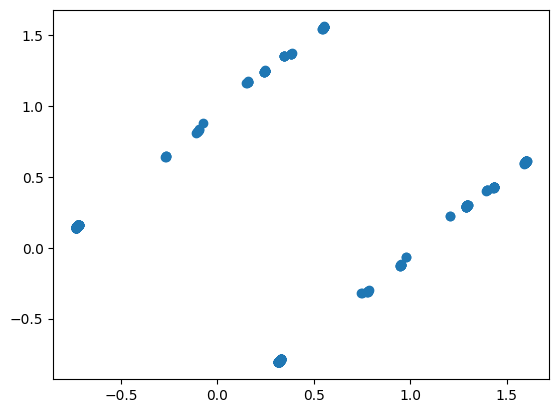

In [ ]:
X_transformed = PCA(n_components=2).fit_transform(X_train)
X_transformed = [[val[0] for val in X_transformed], [val[1] for val in X_transformed]]
plt.scatter(X_transformed[0], X_transformed[1])

Observamos entonces que si se generar dos grupos de datos, por lo tanto bajo esta reduccion de dimensionalidad los datos se encuentran en dos categorias de gravedad, o dos categorias de gravedad son representadas por mas del 85% de los datos.

Por ultimo estudiemos esto ejecutando un gridsearch de un pipeline que contiene un pca y un k-vecinos.

In [ ]:
estimators = [('pca', PCA()),
              ('kmeans', KMeans(n_init=10))]
parameters = {
    'pca__n_components': range(1,4),
    'kmeans__n_clusters': range(2, 7)       # Porcentaje de características del Random Forest (10% y 30%).
}

pipe = Pipeline(estimators)
grid_search = GridSearchCV(pipe,
            parameters,
            cv=3)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('kmeans', KMeans(n_init=10))]),
             param_grid={'kmeans__n_clusters': range(2, 7),
                         'pca__n_components': range(1, 4)})

In [ ]:
best_km = grid_search.best_estimator_
best_km.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=1)),
  ('kmeans', KMeans(n_clusters=6, n_init=10))],
 'verbose': False,
 'pca': PCA(n_components=1),
 'kmeans': KMeans(n_clusters=6, n_init=10),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 1,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'kmeans__algorithm': 'lloyd',
 'kmeans__copy_x': True,
 'kmeans__init': 'k-means++',
 'kmeans__max_iter': 300,
 'kmeans__n_clusters': 6,
 'kmeans__n_init': 10,
 'kmeans__random_state': None,
 'kmeans__tol': 0.0001,
 'kmeans__verbose': 0}

In [ ]:
grid_search.best_score_

-0.5470776359394006

Aqui el mejor estimador presenta 6 cluster, el problema es que el score obtenido no es satisfactorio, por lo tanto se descarta esta posibilidad.

Finalmente, despues de todo este estudio podemos concluir que los datos nos indican que la mayor parte de estos describen dos categorias de gravedad de los siniestros, esto es coherente con estudios previos hechos en torno a estadistica inferencial para el modulo anterior. Ademas la edad es de las variables que mas influye en la gravedad de los siniestros, esto es informacion valiosa que le permite reorientar la campañas publicitaria a la empresa para dirigir su publico objetivo a determinado rango de edad. Por ultimo, notamos que los modelos regresores no presentaron un desempeño deseable, por lo tanto se descarta el uso de estos para series de tiempo con este nivel de complejidad y queda abierto el estudio con modelos mas robustos orientados al manejo de series temporales.